In [1]:
import requests
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [17]:
response = requests.get('https://api.census.gov/data/2018/abscs?get=RACE_GROUP,RACE_GROUP_LABEL,NAICS2017,NAICS2017_LABEL,EMP&for=us:*')

In [18]:
race_employees_json = response.json()

In [22]:
race_employees_columns = race_employees_json[0]
race_employees = pd.DataFrame(race_employees_json[1:], columns = race_employees_columns)
race_employees = race_employees[(race_employees["RACE_GROUP"] != "00") & (race_employees["RACE_GROUP"] != "92") & (race_employees["RACE_GROUP"] != "90") & (race_employees['NAICS2017'] != "00") & (race_employees["RACE_GROUP"] != "91")]
race_employees

,RACE_GROUP,RACE_GROUP_LABEL,NAICS2017,NAICS2017_LABEL,EMP,us
10,30,White,11,"Agriculture, forestry, fishing and hunting",427716,1
11,50,American Indian and Alaska Native,11,"Agriculture, forestry, fishing and hunting",0,1
12,60,Asian,11,"Agriculture, forestry, fishing and hunting",0,1
13,40,Black or African American,11,"Agriculture, forestry, fishing and hunting",0,1
15,30,White,21,"Mining, quarrying, and oil and gas extraction",255549,1
...,...,...,...,...,...,...
180,60,Asian,99,Industries not classified,868,1
181,70,Native Hawaiian and Other Pacific Islander,99,Industries not classified,39,1
186,40,Black or African American,22,Utilities,75,1
187,50,American Indian and Alaska Native,22,Utilities,89,1


In [40]:
race_employee_industry = race_employees.pivot_table(values = 'EMP', index='NAICS2017_LABEL', columns = 'RACE_GROUP_LABEL', aggfunc = np.sum).fillna(0)
race_employee_industry = race_employee_industry[race_employee_industry.columns.sort_values(ascending = False)]
race_employee_industry = race_employee_industry.astype(int)
race_employee_industry.sort_values('White', ascending = False, inplace = True)
race_employee_industry

RACE_GROUP_LABEL,White,Native Hawaiian and Other Pacific Islander,Black or African American,Asian,American Indian and Alaska Native
NAICS2017_LABEL,,,,,
Accommodation and food services,8504641,8085,199284,1784264,24869
Administrative and support and waste management and remediation services,6576051,6203,183146,292247,31419
Health care and social assistance,6130569,0,434403,673308,22120
Retail trade,5729987,0,38747,594017,15171
Construction,5656098,6657,47963,89882,35950
Manufacturing,5348392,2352,18404,222724,10131
"Professional, scientific, and technical services",4765795,4591,100039,430402,25254
Wholesale trade,3199651,0,11593,246207,7534
Transportation and warehousing,2009498,2035,47818,63829,6044


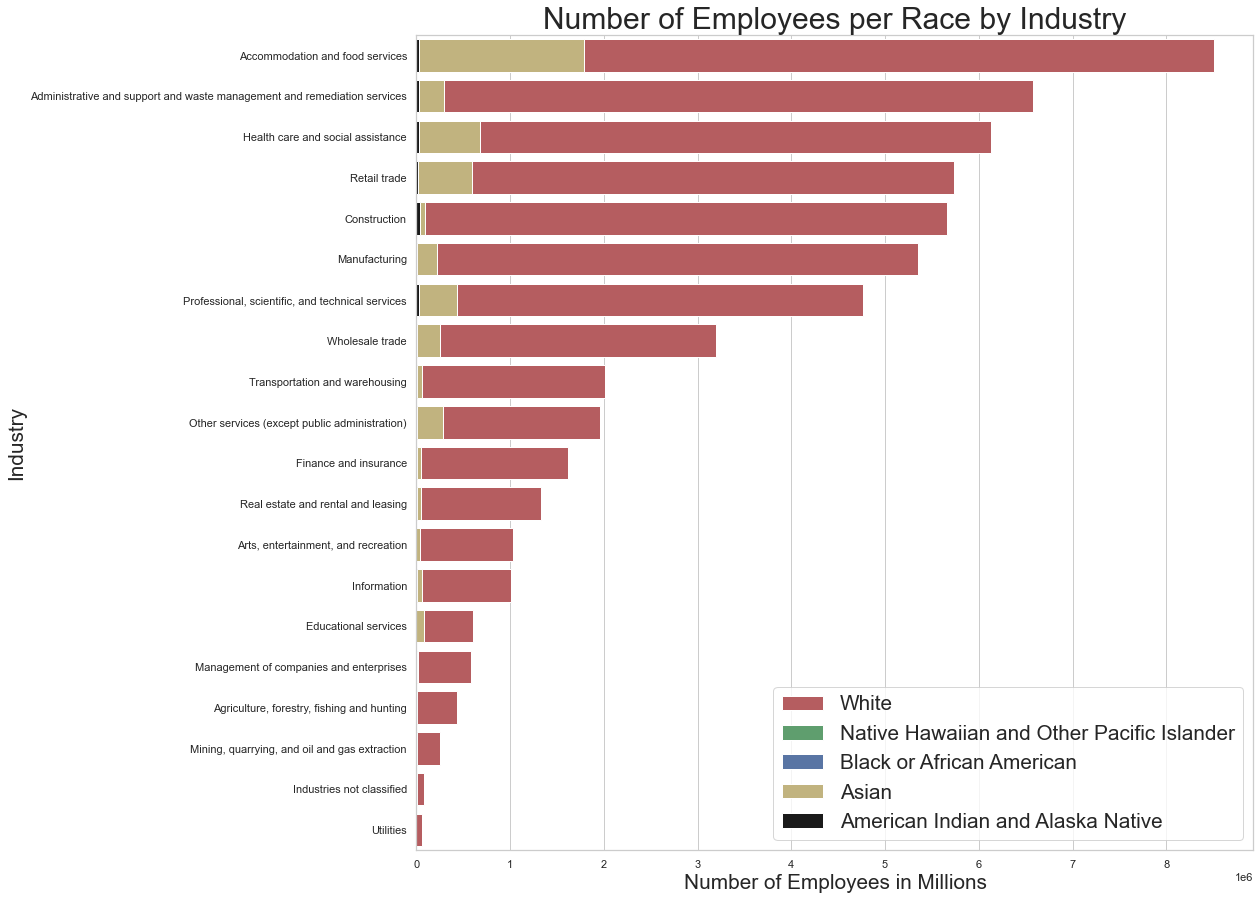

In [337]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style = "whitegrid")
sns.set_palette("bright")
races = race_employee_industry.columns
palette = "deep, muted, pastel, dark, bright, colorblind".split(", ")
colors = "r,g,b,y,k,w".split(",")
for index, race in enumerate(races):
    sns.color_palette()
    sns.barplot(x=race_employee_industry[race], 
                y=race_employee_industry.index,
                label = race,
                color = colors[index])
    #print(index, race)

ax.legend(loc = 0, fontsize = 'xx-large')
#plt.xticks(ticks = [x for x in range(0, 10*10**6, 10**6)])
plt.xlabel("Number of Employees in Millions", fontsize = 'xx-large')
plt.ylabel("Industry", fontsize = 'xx-large')
plt.title("Number of Employees per Race by Industry", fontsize = 30)
plt.show()

In [12]:
response = requests.get('https://api.census.gov/data/2018/abscbo?get=OWNER_RACE,OWNER_RACE_LABEL,OWNPDEMP,NAICS2017,NAICS2017_LABEL&for=us:*')
race_owners_json = response.json()

In [50]:
race_owners_columns = race_owners_json[0]
race_owners = pd.DataFrame(race_owners_json[1:], columns = race_owners_columns)
race_owners = race_owners[(race_owners['NAICS2017'] != "00") & (race_owners['OWNER_RACE'] != "00") & (race_owners['OWNER_RACE'] != "90") & (race_owners['OWNER_RACE'] != "92")][['OWNER_RACE_LABEL','NAICS2017_LABEL', 'OWNPDEMP']]
race_owners.OWNPDEMP = race_owners.OWNPDEMP.astype(int)
race_owners

,OWNER_RACE_LABEL,NAICS2017_LABEL,OWNPDEMP
9,White,"Agriculture, forestry, fishing and hunting",1840
14,White,"Mining, quarrying, and oil and gas extraction",372
16,White,Utilities,12
17,Asian,Utilities,0
21,White,Construction,21492
...,...,...,...
117,White,Other services (except public administration),10889
118,Black or African American,Other services (except public administration),129
119,Asian,Other services (except public administration),150
123,American Indian and Alaska Native,Industries not classified,0


In [184]:
race_owner_industry = race_owners.pivot_table(values = 'OWNPDEMP', index='NAICS2017_LABEL', columns = 'OWNER_RACE_LABEL', aggfunc = np.sum).fillna(0)
race_owner_industry = race_owner_industry[race_owner_industry.columns.sort_values(ascending = False)]
race_owner_industry.sort_values('White', ascending = False, inplace = True)
race_owner_industry

OWNER_RACE_LABEL,White,Native Hawaiian and Other Pacific Islander,Black or African American,Asian,American Indian and Alaska Native
NAICS2017_LABEL,,,,,
Construction,21492.0,0.0,180.0,152.0,108.0
Retail trade,21089.0,0.0,163.0,571.0,0.0
"Professional, scientific, and technical services",17451.0,0.0,79.0,408.0,47.0
Health care and social assistance,12358.0,0.0,370.0,1215.0,0.0
Manufacturing,11067.0,0.0,8.0,143.0,24.0
Other services (except public administration),10889.0,0.0,129.0,150.0,0.0
Wholesale trade,8699.0,0.0,76.0,266.0,15.0
Real estate and rental and leasing,8474.0,0.0,0.0,240.0,0.0
Administrative and support and waste management and remediation services,6330.0,0.0,0.0,0.0,0.0


0 White
1 Native Hawaiian and Other Pacific Islander
2 Black or African American
3 Asian
4 American Indian and Alaska Native


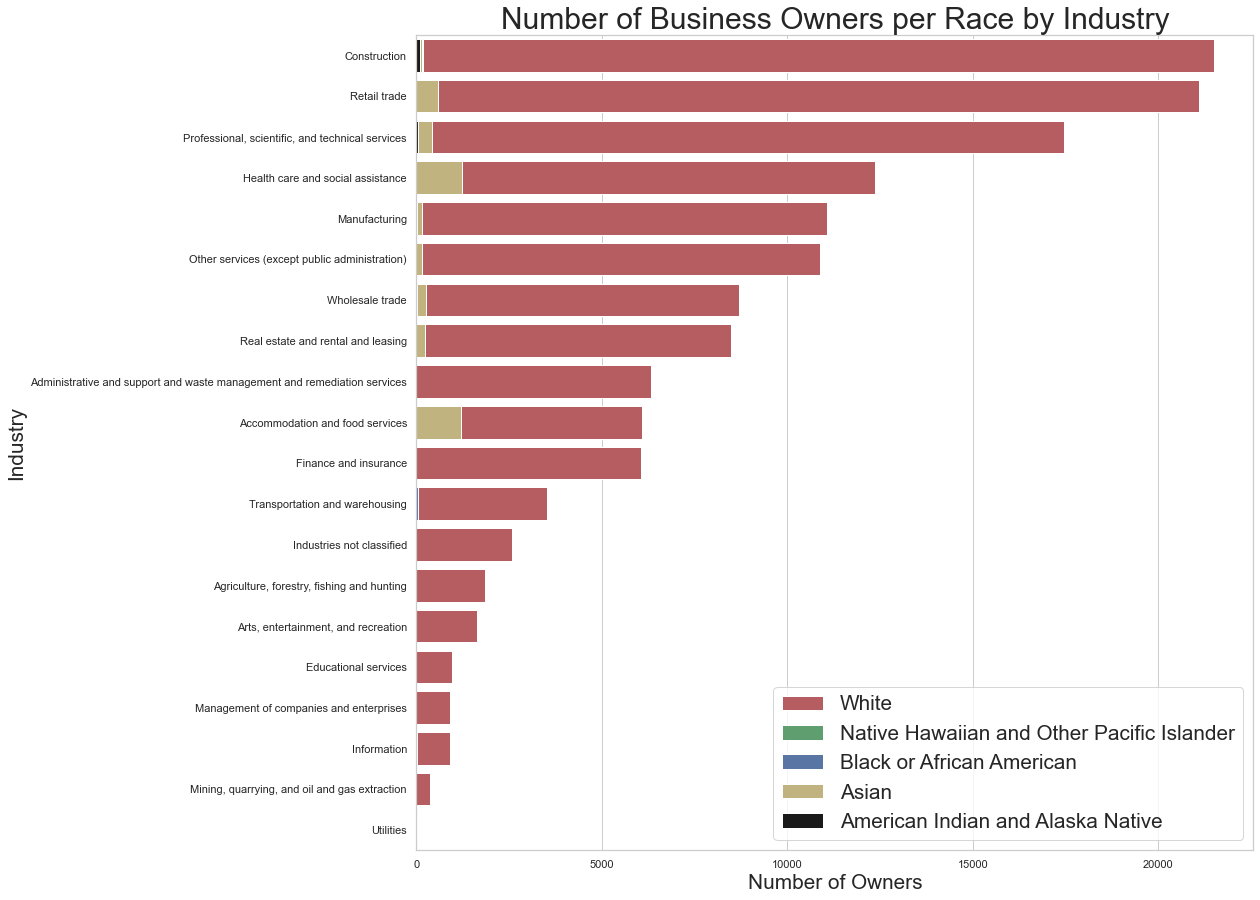

In [208]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style = "whitegrid")
sns.set_palette("bright")
races = race_owner_industry.columns
palette = "deep, muted, pastel, dark, bright, colorblind".split(", ")
colors = "r,g,b,y,k,w".split(",")
for index, race in enumerate(races):
    sns.color_palette()
    sns.barplot(x=race_owner_industry[race], 
                y=race_owner_industry.index,
                label = race,
                color = colors[index])
    print(index, race)

ax.legend(loc = 0, fontsize = 'xx-large')
plt.xlabel("Number of Owners", fontsize = 'xx-large')
plt.ylabel("Industry", fontsize = 'xx-large')
plt.title("Number of Business Owners per Race by Industry", fontsize = 30)
plt.show()


In [307]:
employees_owners = race_employees.merge(race_owners, how = 'inner', left_on = ['RACE_GROUP_LABEL', 'NAICS2017_LABEL'], right_on = ['OWNER_RACE_LABEL', 'NAICS2017_LABEL'])
employees_owners.EMP = employees_owners.EMP.astype(int)
employees_owners.OWNPDEMP = employees_owners.OWNPDEMP.astype(int)
employees_owners['logEMP'] = np.log(employees_owners['EMP'])
#employees_owners.rename(columns = {"RACE_GROUP_LABEL":"Race Group"}, inplace = True)
employees_owners

c:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,RACE_GROUP,RACE_GROUP_LABEL,NAICS2017,NAICS2017_LABEL,EMP,us,OWNER_RACE_LABEL,OWNPDEMP,logEMP
0,30,White,11,"Agriculture, forestry, fishing and hunting",427716,1,White,1840,12.966215
1,30,White,21,"Mining, quarrying, and oil and gas extraction",255549,1,White,372,12.451169
2,30,White,22,Utilities,60851,1,White,12,11.016184
3,60,Asian,23,Construction,89882,1,Asian,152,11.406253
4,40,Black or African American,23,Construction,47963,1,Black or African American,180,10.778185
...,...,...,...,...,...,...,...,...,...
57,60,Asian,81,Other services (except public administration),285593,1,Asian,150,12.562323
58,40,Black or African American,81,Other services (except public administration),37581,1,Black or African American,129,10.534254
59,30,White,99,Industries not classified,80576,1,White,2587,11.296956
60,50,American Indian and Alaska Native,99,Industries not classified,248,1,American Indian and Alaska Native,0,5.513429


In [183]:
employees_owners[['EMP','OWNPDEMP']].corr()
round(employees_owners[['EMP','OWNPDEMP']].corr().at['EMP', 'OWNPDEMP'], 2)

0.81

Text(0.5, 1.05, 'Number of Employees vs Number of Owners of Same Race')

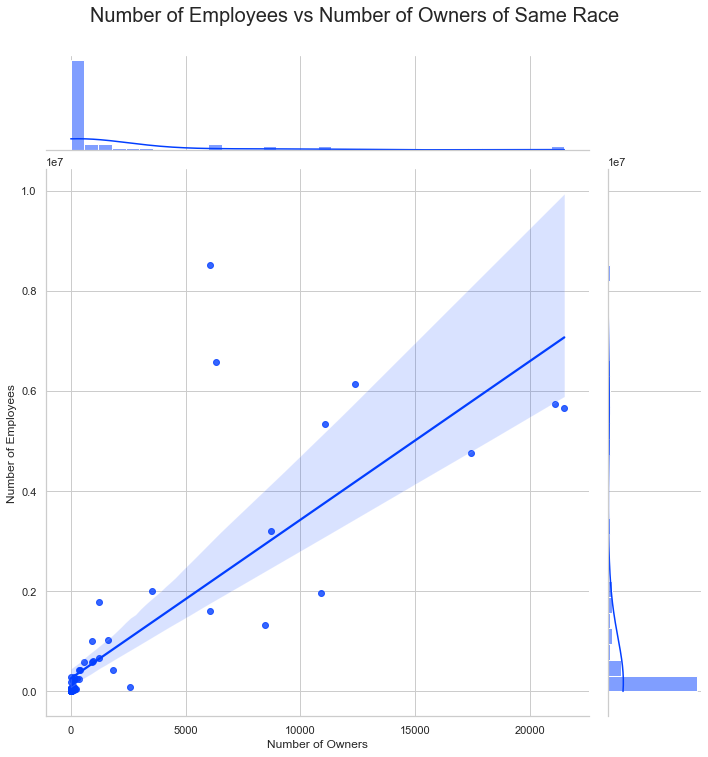

In [329]:
ax = sns.jointplot(x = 'OWNPDEMP', y = 'EMP', data = employees_owners, kind = 'reg', height = 10)
ax.set_axis_labels('Number of Owners', 'Number of Employees')
ax.fig.suptitle('Number of Employees vs Number of Owners of Same Race', fontsize = 20, y = 1.05)

['White',
 'Asian',
 'Black or African American',
 'Native Hawaiian and Other Pacific Islander',
 'American Indian and Alaska Native']

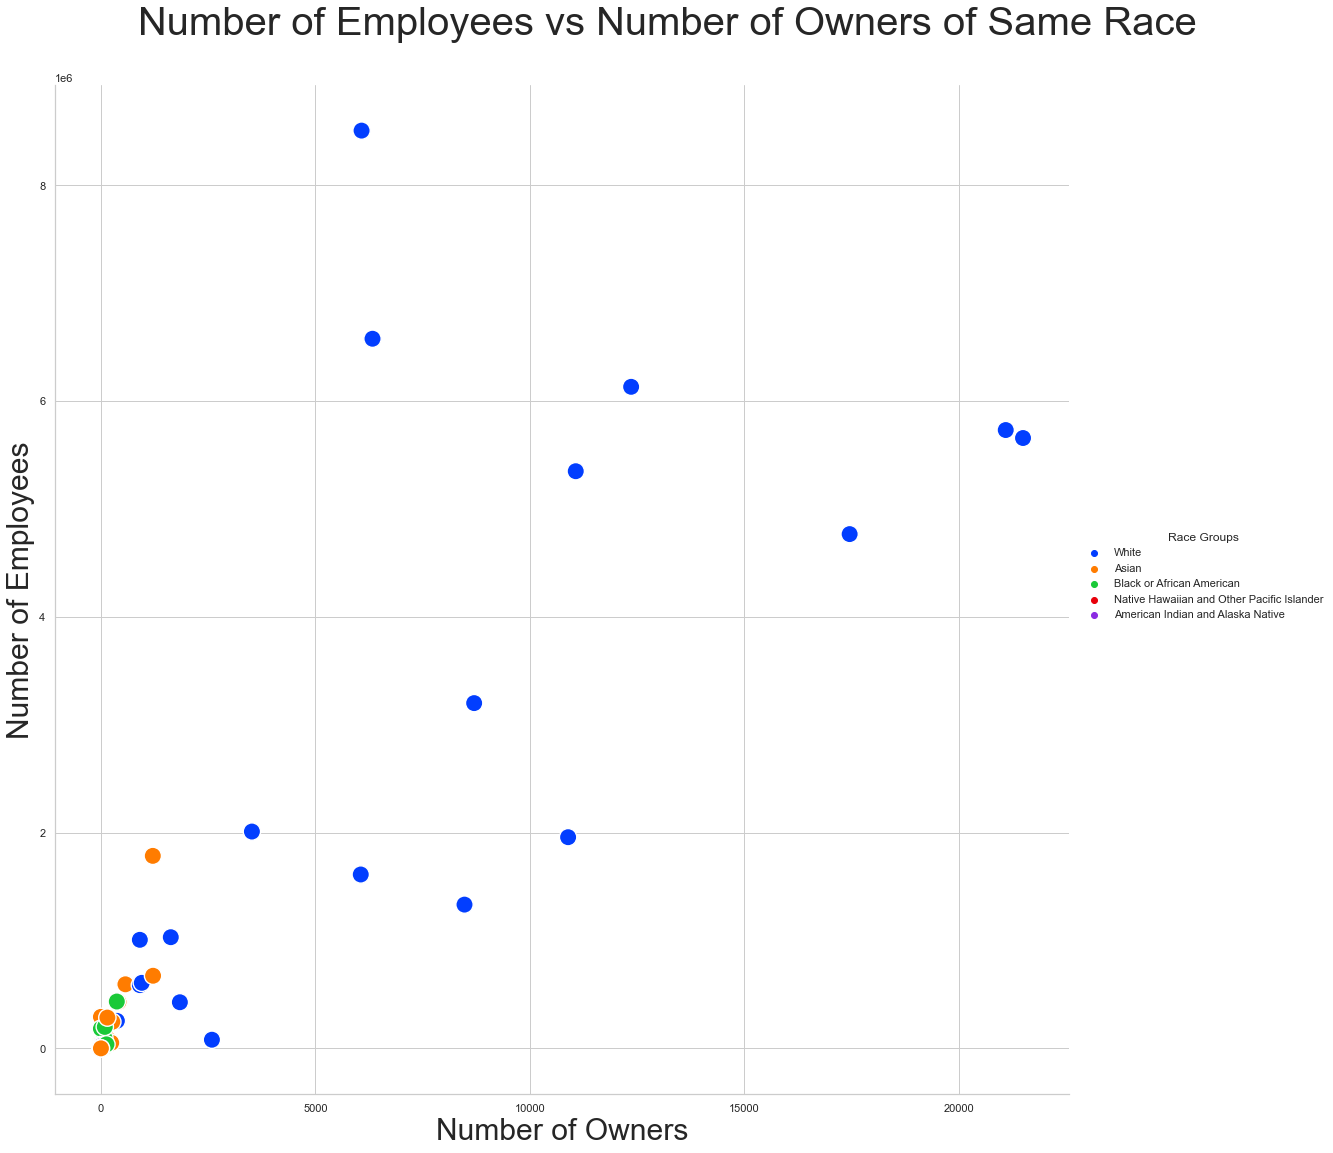

In [348]:
ax = sns.relplot(x = 'OWNPDEMP', y = 'EMP', data = employees_owners, height = 15, hue = 'OWNER_RACE_LABEL', legend = True, s = 300)
ax._legend.set_title("Race Groups")
ax.set_axis_labels('Number of Owners', 'Number of Employees', fontsize = 30)
ax.fig.suptitle('Number of Employees vs Number of Owners of Same Race', fontsize = 40, y = 1.05)
list(employees_owners['RACE_GROUP_LABEL'].unique())

In [262]:
response = requests.get('https://api.census.gov/data/2018/abscbo?get=OWNCHAR,OWNCHAR_LABEL&for=us:*')
ownchar_json = response.json()

In [263]:
ownchar_columns = ownchar_json[0]
ownchar = pd.DataFrame(ownchar_json[1:], columns = ownchar_columns)
ownchar

,OWNCHAR,OWNCHAR_LABEL,us
0,CG,Before 1980,1
1,CH,1980 to 1989,1
2,CI,1990 to 1999,1
3,CI01,2000 to 2007,1
4,CI02,2008 to 2012,1
5,CI03,2013 to 2017,1
6,CM03,2018,1
7,CN,Don't know,1
8,CO,Total reporting,1
9,CP,Item not reported,1


In [143]:
response = requests.get('https://api.census.gov/data/2018/abscs?get=RACE_GROUP,RACE_GROUP_LABEL,RCPPDEMP&for=us:*')
employee_sales_json = response.json()

In [267]:
states = pd.read_csv('state.txt', sep='|')
states

,STATE,STUSAB,STATE_NAME,STATENS
0,1,AL,Alabama,1779775
1,2,AK,Alaska,1785533
2,4,AZ,Arizona,1779777
3,5,AR,Arkansas,68085
4,6,CA,California,1779778
5,8,CO,Colorado,1779779
6,9,CT,Connecticut,1779780
7,10,DE,Delaware,1779781
8,11,DC,District of Columbia,1702382
9,12,FL,Florida,294478


In [276]:
race_emp_state_columns = race_emp_state_json[0]
race_emp_state = pd.DataFrame(race_emp_state_json[1:], columns = race_emp_state_columns)
race_emp_state[['RACE_GROUP', 'RACE_GROUP_LABEL']].value_counts()
race_emp_state = race_emp_state[(race_emp_state['RACE_GROUP'] != '00') & (race_emp_state['RACE_GROUP'] != '90') & (race_emp_state['RACE_GROUP'] != '91') & (race_emp_state['RACE_GROUP'] != '92')]
race_emp_state.state = race_emp_state.state.astype(int)
race_emp_state.EMP = race_emp_state.EMP.astype(int)
race_emp_state

,RACE_GROUP,RACE_GROUP_LABEL,EMP,state
1,50,American Indian and Alaska Native,295,28
2,60,Asian,26344,28
3,30,White,463467,28
4,70,Native Hawaiian and Other Pacific Islander,0,28
7,40,Black or African American,13225,28
...,...,...,...,...
448,60,Asian,52393,27
449,30,White,1162915,27
450,70,Native Hawaiian and Other Pacific Islander,0,27
453,40,Black or African American,18298,27


In [277]:
race_emp_state_merged = race_emp_state.merge(states, how = 'inner', left_on = 'state', right_on = 'STATE')
race_emp_state_merged

,RACE_GROUP,RACE_GROUP_LABEL,EMP,state,STATE,STUSAB,STATE_NAME,STATENS
0,50,American Indian and Alaska Native,295,28,28,MS,Mississippi,1779790
1,60,Asian,26344,28,28,MS,Mississippi,1779790
2,30,White,463467,28,28,MS,Mississippi,1779790
3,70,Native Hawaiian and Other Pacific Islander,0,28,28,MS,Mississippi,1779790
4,40,Black or African American,13225,28,28,MS,Mississippi,1779790
...,...,...,...,...,...,...,...,...
248,60,Asian,52393,27,27,MN,Minnesota,662849
249,30,White,1162915,27,27,MN,Minnesota,662849
250,70,Native Hawaiian and Other Pacific Islander,0,27,27,MN,Minnesota,662849
251,40,Black or African American,18298,27,27,MN,Minnesota,662849


In [282]:
race_emp_state_pivot = race_emp_state_merged.pivot_table(values = 'EMP', index='STATE_NAME', columns = 'RACE_GROUP_LABEL', aggfunc = np.sum).fillna(0)
race_emp_state_pivot = race_emp_state_pivot[race_emp_state_pivot.columns.sort_values(ascending = False)]
race_emp_state_pivot.sort_values('White', ascending = False, inplace = True)
race_emp_state_pivot

RACE_GROUP_LABEL,White,Native Hawaiian and Other Pacific Islander,Black or African American,Asian,American Indian and Alaska Native
STATE_NAME,,,,,
California,6111082.0,15906.0,95900.0,1477299.0,25288.0
Texas,4636879.0,0.0,134000.0,444554.0,23274.0
Florida,3658814.0,0.0,81378.0,220701.0,6740.0
New York,3572599.0,0.0,51650.0,457727.0,3775.0
Illinois,2442640.0,415.0,39320.0,170529.0,3310.0
Pennsylvania,2300748.0,863.0,42697.0,0.0,0.0
Ohio,2111550.0,0.0,43197.0,94793.0,0.0
Michigan,1935742.0,618.0,43870.0,101628.0,7812.0
New Jersey,1758070.0,435.0,24507.0,222866.0,0.0


0 White
1 Native Hawaiian and Other Pacific Islander
2 Black or African American
3 Asian
4 American Indian and Alaska Native


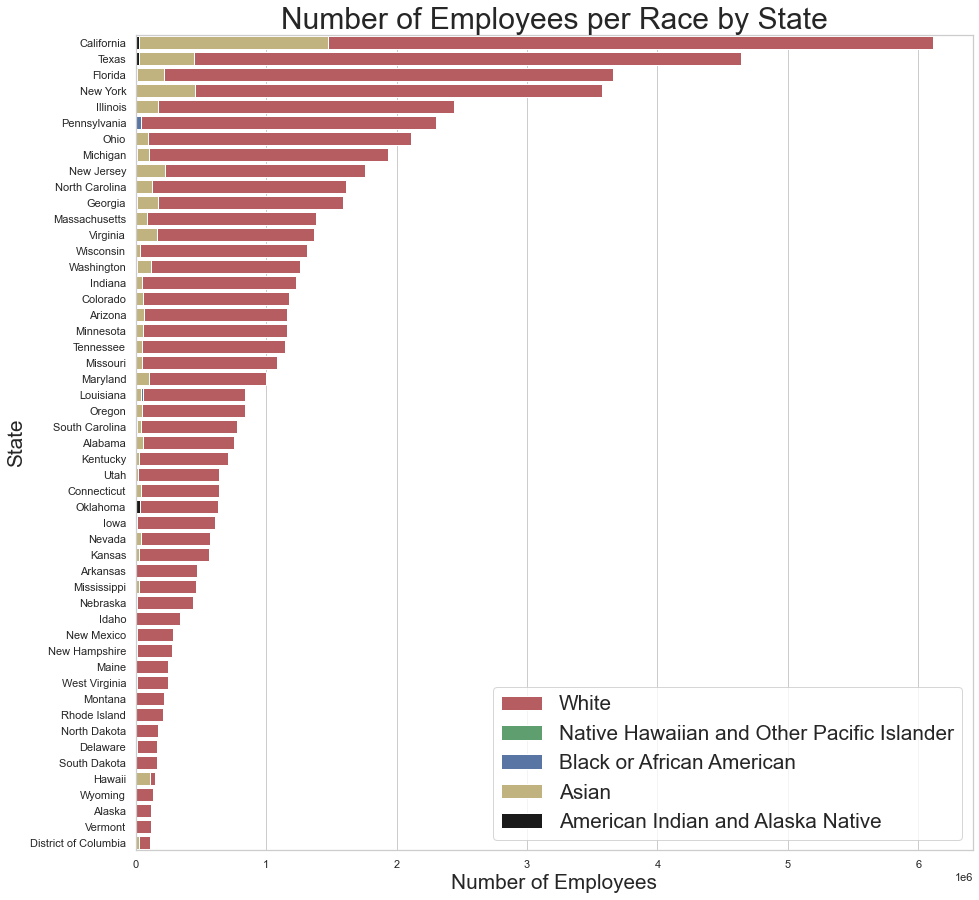

In [336]:
f, ax = plt.subplots(figsize=(15, 15))
sns.set_theme(style = "whitegrid")
sns.set_palette("bright")
races = race_emp_state_pivot.columns
palette = "deep, muted, pastel, dark, bright, colorblind".split(", ")
colors = "r,g,b,y,k,w".split(",")
for index, race in enumerate(races):
    sns.color_palette()
    sns.barplot(x=race_emp_state_pivot[race], 
                y=race_emp_state_pivot.index,
                label = race,
                color = colors[index])
    print(index, race)

ax.legend(loc = 0, fontsize = 'xx-large')
plt.xlabel("Number of Employees", fontsize = 'xx-large')
plt.ylabel("State", fontsize = 'xx-large')
plt.title("Number of Employees per Race by State", fontsize = 30)
plt.show()